In [32]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [5]:
train = pd.read_csv('C:\\Users\\Ralph Ossenblok\\git\\data-analytics-and-science\\exercises\\exercise 1 - loan prediction problem\\data\\train.csv')

In [10]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [37]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [18]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


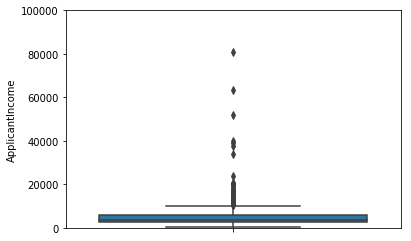

In [36]:
plt.ylim(0, 100000)

sb.boxplot(y = 'ApplicantIncome', data = train)

In [34]:
property_areas = pd.get_dummies(df['Property_Area'])

df = pd.concat([df, property_areas], axis = 1)

df.drop(['Property_Area'], inplace = True, axis = 1)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Y,0,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N,1,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y,0,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y,0,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y,0,0,1


In [43]:
df = df.replace({
    'Gender': {'Male': 0, 'Female': 1}, 
    'Education': {'Graduate': 0, 'Not Graduate': 1}, 
    'Married': { 'Yes': 0, 'No': 1},
    'Self_Employed': { 'Yes': 0, 'No': 1},
    'Loan_Status': { 'Y': 0, 'N': 1}
    })


TypeError: Cannot compare types 'ndarray(dtype=float64)' and 'str'

In [44]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban
0,LP001002,0.0,1.0,0,0,1.0,5849,0.0,NaN,360.0,1.0,0,0,0,1
1,LP001003,0.0,0.0,1,0,1.0,4583,1508.0,128.0,360.0,1.0,1,1,0,0
2,LP001005,0.0,0.0,0,0,0.0,3000,0.0,66.0,360.0,1.0,0,0,0,1
3,LP001006,0.0,0.0,0,1,1.0,2583,2358.0,120.0,360.0,1.0,0,0,0,1
4,LP001008,0.0,1.0,0,0,1.0,6000,0.0,141.0,360.0,1.0,0,0,0,1


In [90]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Loan_Status           0
Rural                 0
Semiurban             0
Urban                 0
dtype: int64

In [49]:
df['LoanAmount'].median()

128.0

In [64]:
df['Self_Employed'] = df['Self_Employed'].fillna(1.0)

In [76]:
table = df.pivot_table(values = 'LoanAmount', index = 'Self_Employed', columns = 'Education', aggfunc = np.median)

In [80]:
def loanvalues(series):
    return table.loc[series['Self_Employed'], series['Education']]

In [81]:
#                     SERIES          NAs  (                Waardes voor fill na                    )        
df['LoanAmount'] = df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(loanvalues, axis = 1))

In [88]:
df['Gender'].value_counts()

0.0    489
1.0    112
Name: Gender, dtype: int64

In [89]:
df['Gender'] = df['Gender'].fillna(0.0)